**Define the necessary libraries** (1 mark)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset into the dataframe** (1 mark)

In [2]:
df=pd.read_csv('BigmartSales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Drop the "Item_Identifier" and "Outlet_Identifier" columns** (1 mark)

In [3]:
columns_to_drop = ['Item_Identifier', 'Outlet_Identifier']
df1 = df.drop(columns=columns_to_drop)
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


**Extract the target labels** (1 mark)

In [5]:
target_labels = df1['Item_Outlet_Sales']
target_labels

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

**Replace the field "Item_Fat_Content" with numerical value** (1 mark)

In [6]:
fat_content_mapping = {'Low Fat': 0, 'LF': 0, 'reg': 0, 'Regular': 1}
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace(fat_content_mapping)
df1['Item_Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Item_Fat_Content, Length: 8523, dtype: object

**Perform ordinal encoding of the "Item_Type", "Outlet_Type", "Outlet_Location_Type" and "Outlet_Type" field** (1 mark)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# List of columns to be ordinal encoded
columns_to_encode = ['Item_Type', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Type']

# Extract the specified columns
data_to_encode = df1[columns_to_encode]

# Fit and transform the data using OrdinalEncoder
encoded_data = ordinal_encoder.fit_transform(data_to_encode)

# Replace the original columns with the encoded values
df1[columns_to_encode] = encoded_data
df1[columns_to_encode]

,Item_Type,Outlet_Type,Outlet_Location_Type,Outlet_Type
0,4.0,1.0,0.0,1.0
1,14.0,2.0,2.0,2.0
2,10.0,1.0,0.0,1.0
3,6.0,0.0,2.0,0.0
4,9.0,1.0,2.0,1.0
...,...,...,...,...
8518,13.0,1.0,2.0,1.0
8519,0.0,1.0,1.0,1.0
8520,8.0,1.0,1.0,1.0
8521,13.0,2.0,2.0,2.0


**Imputation of "Outlet_Size" field with mode value** (1 mark)

In [8]:
mode_value = df['Outlet_Size'].mode()[0]

# Impute missing values with the mode
df1['Outlet_Size'] = df1['Outlet_Size'].fillna(mode_value)
df1['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

**Check for null values** (1 mark)

In [9]:
null_values = df1.isnull().sum()

# Display the count of null values for each column
print("Null values in the table:")
print(null_values)

Null values in the table:
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**Imputation of "Item_Weight" field with mode value** (1 mark)

In [10]:
item_weight_mode = df1['Item_Weight'].mode()[0]

# Impute missing values in 'Item_Weight' with the mode
df1['Item_Weight'].fillna(item_weight_mode, inplace=True)
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4.0,249.8092,1999,Medium,0.0,1.0,3735.1380
1,5.920,1,0.019278,14.0,48.2692,2009,Medium,2.0,2.0,443.4228
2,17.500,0,0.016760,10.0,141.6180,1999,Medium,0.0,1.0,2097.2700
3,19.200,1,0.000000,6.0,182.0950,1998,Medium,2.0,0.0,732.3800
4,8.930,0,0.000000,9.0,53.8614,1987,High,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13.0,214.5218,1987,High,2.0,1.0,2778.3834
8519,8.380,1,0.046982,0.0,108.1570,2002,Medium,1.0,1.0,549.2850
8520,10.600,0,0.035186,8.0,85.1224,2004,Small,1.0,1.0,1193.1136
8521,7.210,1,0.145221,13.0,103.1332,2009,Medium,2.0,2.0,1845.5976


**Display all field in the dataset using boxplot** (1 mark)

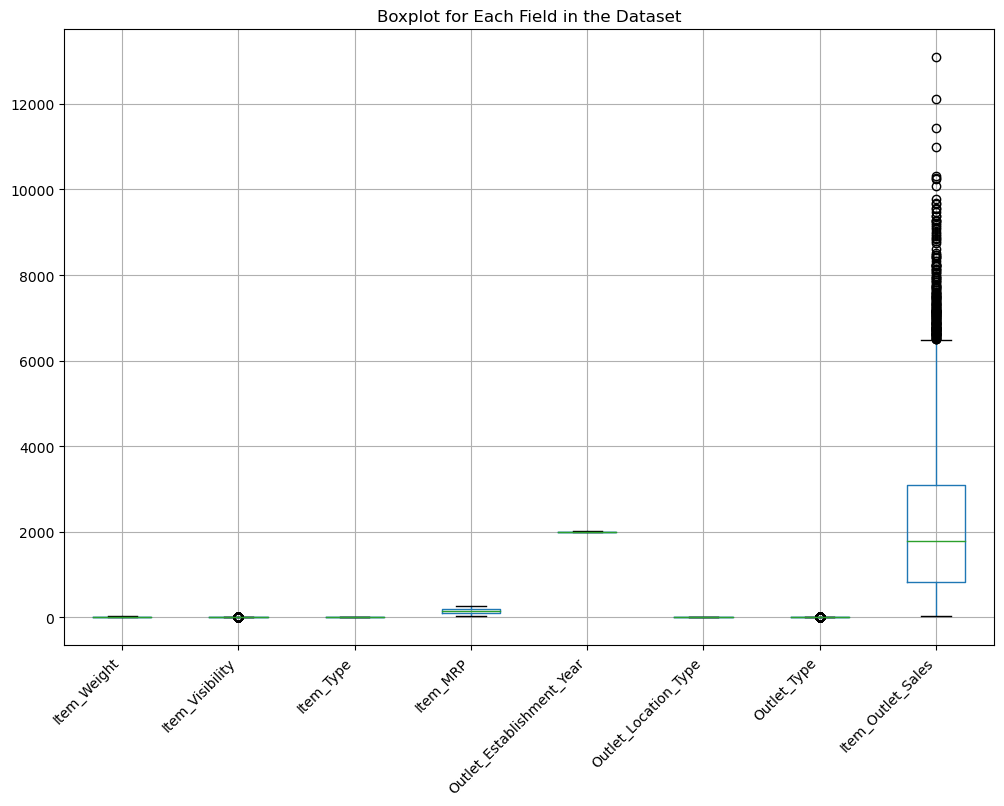

In [11]:
df1.boxplot(figsize=(12, 8))
plt.title('Boxplot for Each Field in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4.0,249.8092,1999,Medium,0.0,1.0,3735.1380
1,5.920,1,0.019278,14.0,48.2692,2009,Medium,2.0,2.0,443.4228
2,17.500,0,0.016760,10.0,141.6180,1999,Medium,0.0,1.0,2097.2700
3,19.200,1,0.000000,6.0,182.0950,1998,Medium,2.0,0.0,732.3800
4,8.930,0,0.000000,9.0,53.8614,1987,High,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13.0,214.5218,1987,High,2.0,1.0,2778.3834
8519,8.380,1,0.046982,0.0,108.1570,2002,Medium,1.0,1.0,549.2850
8520,10.600,0,0.035186,8.0,85.1224,2004,Small,1.0,1.0,1193.1136
8521,7.210,1,0.145221,13.0,103.1332,2009,Medium,2.0,2.0,1845.5976


**Split the dataset into train and test(20%), apply Linear Regression and calculate RMSE value** (1 mark)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df1.drop(columns=['Item_Outlet_Sales'])  # Features
y = df1['Item_Outlet_Sales']  # Target variable

# Handle categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1068.9702501089955


**Apply StandardScaller and split the dataset into train and test(20%)** (1 mark)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Split the dataset into training and testing sets (80% train, 20% test)
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the scaler on the training set
Xx_train_scaled = scaler.fit_transform(Xx_train)

# Transform the testing set using the same scaler
Xx_test_scaled = scaler.transform(Xx_test)



**Display all field in the dataset using boxplot** (1 mark)

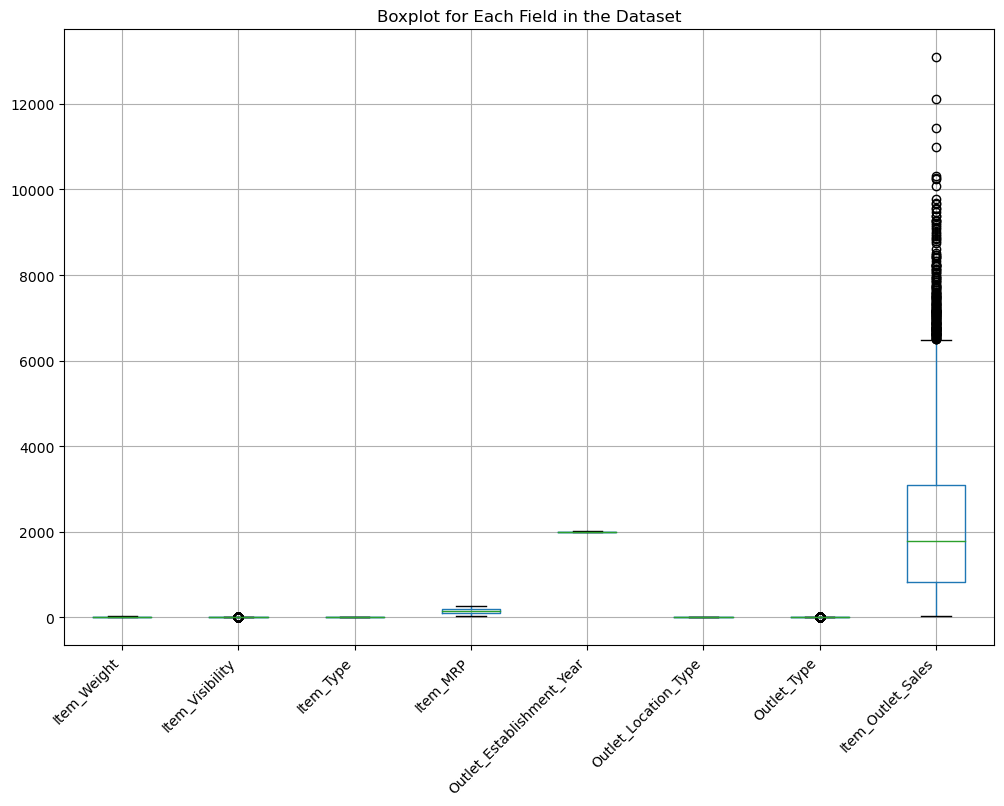

In [15]:
df1.boxplot(figsize=(12, 8))
plt.title('Boxplot for Each Field in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

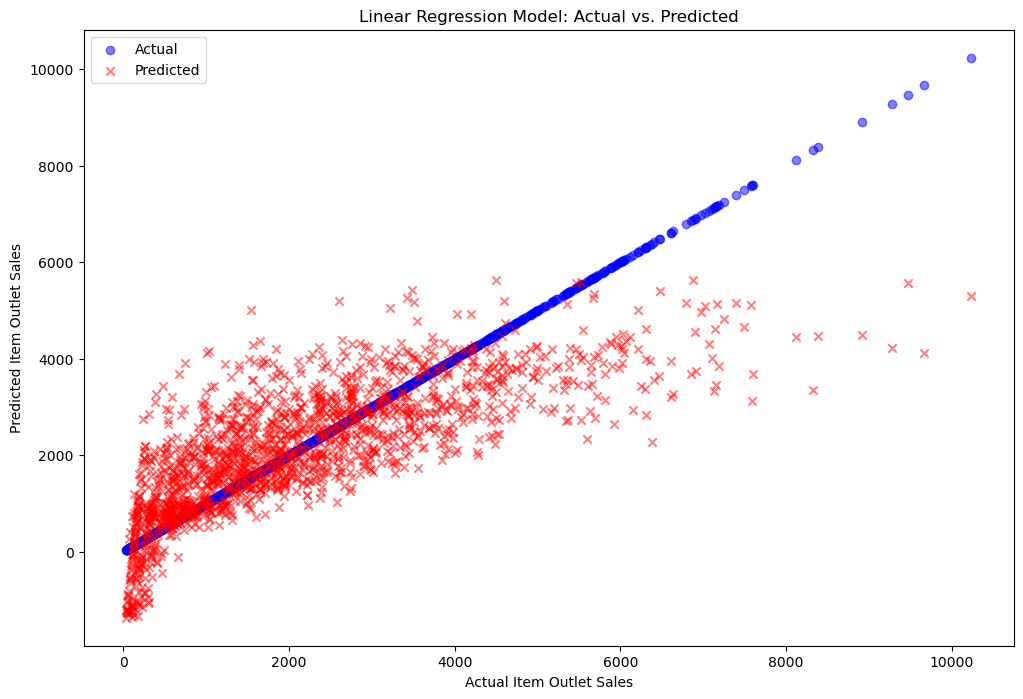

In [16]:
# I think the question is wrong so,
# here is the scattered plot for the above said set
# before applying STANDARDSCALER

plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test, label='Actual', alpha=0.5, color='blue', marker='o')
plt.scatter(y_test, y_pred, label='Predicted', alpha=0.5, color='red', marker='x')

plt.title('Linear Regression Model: Actual vs. Predicted')
plt.xlabel('Actual Item Outlet Sales')
plt.ylabel('Predicted Item Outlet Sales')
plt.legend()
plt.show()

**Apply Linear Regression and calculate RMSE value** (1 mark)

In [17]:
model = LinearRegression()

# Train the model on the scaled training data
model.fit(Xx_train_scaled, yy_train)

# Make predictions on the scaled test set
yy_pred = model.predict(Xx_test_scaled)

# Calculate RMSE
Srmse = np.sqrt(mean_squared_error(yy_test, yy_pred))

print(f'Root Mean Squared Error (RMSE): {Srmse}')

Root Mean Squared Error (RMSE): 1068.9702501089953


**Apply MinMaxScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [18]:
from sklearn.preprocessing import MinMaxScaler

mmX_train, mmX_test, mmy_train, mmy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training set
mmX_train_scaled = scaler.fit_transform(mmX_train)

# Transform the testing set using the same scaler
mmX_test_scaled = scaler.transform(mmX_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(mmX_train_scaled, mmy_train)

# Make predictions on the scaled test set
mmy_pred = model.predict(mmX_test_scaled)

# Calculate RMSE
MMrmse = np.sqrt(mean_squared_error(mmy_test, mmy_pred))
print(f'Root Mean Squared Error (RMSE): {MMrmse}')


Root Mean Squared Error (RMSE): 1068.9702501089955


**Apply RobustScaler,Split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [19]:
from sklearn.preprocessing import RobustScaler

rsX_train, rsX_test, rsy_train, rsy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = RobustScaler()

# Fit and transform the scaler on the training set
rsX_train_scaled = scaler.fit_transform(rsX_train)

# Transform the testing set using the same scaler
rsX_test_scaled = scaler.transform(rsX_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(rsX_train_scaled, rsy_train)

# Make predictions on the scaled test set
rsy_pred = model.predict(rsX_test_scaled)

# Calculate RMSE
RSrmse = np.sqrt(mean_squared_error(rsy_test, rsy_pred))
print(f'Root Mean Squared Error (RMSE): {RSrmse}')

Root Mean Squared Error (RMSE): 1068.9702501089953


**Apply MaxAbsScaler, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [20]:
from sklearn.preprocessing import  MaxAbsScaler

masX_train, masX_test, masy_train, masy_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler =  MaxAbsScaler()

# Fit and transform the scaler on the training set
masX_train_scaled = scaler.fit_transform(masX_train)

# Transform the testing set using the same scaler
masX_test_scaled = scaler.transform(masX_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(masX_train_scaled, masy_train)

# Make predictions on the scaled test set
masy_pred = model.predict(masX_test_scaled)

# Calculate RMSE
MASrmse = np.sqrt(mean_squared_error(masy_test, masy_pred))
print(f'Root Mean Squared Error (RMSE): {MASrmse}')

Root Mean Squared Error (RMSE): 1068.9702501089967


**Apply Normalizer, split the dataset into train and test(20%), apply LinearRegression and calculate RMSE** (1 mark)

In [21]:
from sklearn.preprocessing import  Normalizer

nX_train, nX_test, ny_train, ny_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Normalizer
normalizer = Normalizer()

# Fit and transform the normalizer on the training set
X_train_normalized = normalizer.fit_transform(nX_train)

# Transform the testing set using the same normalizer
X_test_normalized = normalizer.transform(nX_test)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the normalized training data
model.fit(X_train_normalized, ny_train)

# Make predictions on the normalized test set
ny_pred = model.predict(X_test_normalized)

# Calculate RMSE
Nrmse = np.sqrt(mean_squared_error(ny_test, ny_pred))
print(f'Root Mean Squared Error (RMSE): {Nrmse}')

Root Mean Squared Error (RMSE): 1072.465551234032


**Define a function valuelabel to place the legend of each bar in the histogram** (1 mark)

In [26]:
def valuelabel(ax, bars, spacing=5):
    """
    Add labels with values on top of the bars in a bar chart.

    Parameters:
    - ax: AxesSubplot
        The subplot where the bars are plotted.
    - bars: BarContainer
        The container of bars returned by ax.bar.
    - spacing: int, optional (default=5)
        The vertical spacing between the label and the top of the bar.

    Returns:
    None
    """
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + spacing, round(yval, 2), ha='center', va='bottom')


**Plot a histogram to display the RMSE value of each scaler** (1 mark)

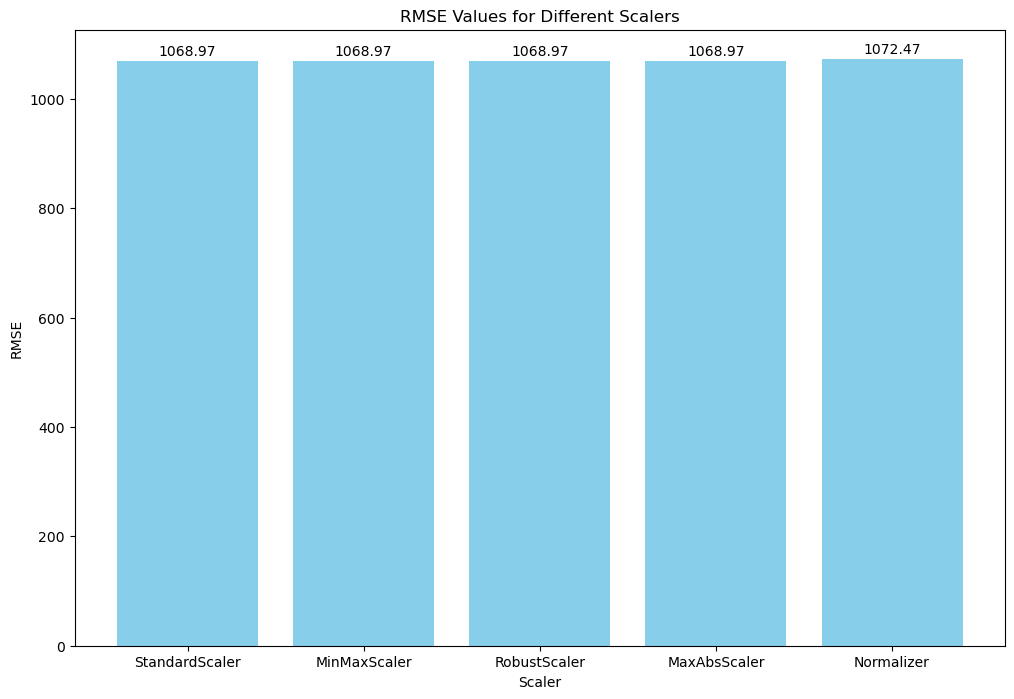

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of scalers
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), MaxAbsScaler(), Normalizer()]
scaler_names = ['StandardScaler', 'MinMaxScaler', 'RobustScaler', 'MaxAbsScaler', 'Normalizer']

# Reinitialize Linear Regression model
model = LinearRegression()

# recalculate RMSE for each scaler
rmse_values = []

for scaler in scalers:
    # Fit and transform the scaler on the training set
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing set using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test set
    y_pred = model.predict(X_test_scaled)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Plotting the histogram
plt.figure(figsize=(12, 8))
bars = plt.bar(scaler_names, rmse_values, color='skyblue')
add_value_labels(plt.gca(), bars)
plt.xlabel('Scaler')
plt.ylabel('RMSE')
plt.title('RMSE Values for Different Scalers')
plt.show()